In [37]:
#package minimum version required
'''d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'matplotlib': '3.4.3',
    'torch': '1.8.0',
    'torchvision': '0.9.0'
}'''

"d = {\n    'numpy': '1.21.2',\n    'scipy': '1.7.0',\n    'matplotlib': '3.4.3',\n    'torch': '1.8.0',\n    'torchvision': '0.9.0'\n}"

### Loading and preprocessing the data

In [19]:
import torchvision 
from torchvision import transforms 
import torch
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

mnist_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=True, 
                                           transform=transform, 
                                           download=True)

from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000)) 
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=False, 
                                           transform=transform, 
                                           download=False)

In [20]:
from torch.utils.data import DataLoader


batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False)

### Implementing a CNN using the torch.nn module

#### Configuring CNN layers in PyTorch

 * **Conv2d:** `torch.nn.Conv2d`
   * `out_channels`
   * `kernel_size`
   * `stride`
   * `padding`
   
   
 * **MaxPool2d:** `torch.nn.MaxPool2d`
   * `kernel_size`
   * `stride`
   * `padding`
   
   
 * **Dropout** `torch.nn.Dropout`
   * `p`

### Constructing a CNN in PyTorch

In [21]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=, out_channels=, kernel_size=, padding=))#make sure the size remains after this layer
model.add_module('relu1', nn.ReLU())        
model.add_module('pool1', nn.MaxPool2d(kernel_size=))#size change from H*W to 0.5 H * 0.5 W   
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=, kernel_size=, padding=))#make sure the size remains after this layer
model.add_module('relu2', nn.ReLU())        
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))#size change from  0.5 H * 0.5 W to 0.25 H * 0.25 W      
model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=, kernel_size=))
model.add_module('relu3', nn.ReLU())        
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))   

x = torch.ones((4, 1, 28, 28))#output shape is [4, 128, 3, 3]
model(x).shape

torch.Size([4, 128, 3, 3])

In [23]:
model.add_module('flatten', nn.Flatten()) 

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 1152])

In [25]:
model.add_module('fc1', nn.Linear(1152, 1024)) 
model.add_module('relu3', nn.ReLU()) 
model.add_module('dropout', nn.Dropout(p=0.5)) 

model.add_module('fc2', nn.Linear(1024, 10)) 

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)
model = model.to(device) 

cuda:0


In [28]:
#TODO: define the loss function
loss_fn = 
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device) 
            y_batch = y_batch.to(device) 
            #training 5 steps
            
            
            
            
            
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device) 
                y_batch = y_batch.to(device) 
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float() 
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 50
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9366 val_accuracy: 0.9645
Epoch 2 accuracy: 0.9689 val_accuracy: 0.9724
Epoch 3 accuracy: 0.9707 val_accuracy: 0.9648
Epoch 4 accuracy: 0.9694 val_accuracy: 0.9701
Epoch 5 accuracy: 0.9665 val_accuracy: 0.9649
Epoch 6 accuracy: 0.9697 val_accuracy: 0.9719
Epoch 7 accuracy: 0.9700 val_accuracy: 0.9691
Epoch 8 accuracy: 0.9701 val_accuracy: 0.9669
Epoch 9 accuracy: 0.9703 val_accuracy: 0.9737
Epoch 10 accuracy: 0.9719 val_accuracy: 0.9628
Epoch 11 accuracy: 0.9708 val_accuracy: 0.9672
Epoch 12 accuracy: 0.9687 val_accuracy: 0.9669
Epoch 13 accuracy: 0.9719 val_accuracy: 0.9692
Epoch 14 accuracy: 0.9708 val_accuracy: 0.9590
Epoch 15 accuracy: 0.9701 val_accuracy: 0.9665
Epoch 16 accuracy: 0.9717 val_accuracy: 0.9708
Epoch 17 accuracy: 0.9687 val_accuracy: 0.9543
Epoch 18 accuracy: 0.9703 val_accuracy: 0.9660
Epoch 19 accuracy: 0.9731 val_accuracy: 0.9711
Epoch 20 accuracy: 0.9731 val_accuracy: 0.9678
Epoch 21 accuracy: 0.9710 val_accuracy: 0.9689
Epoch 22 accuracy: 0.9

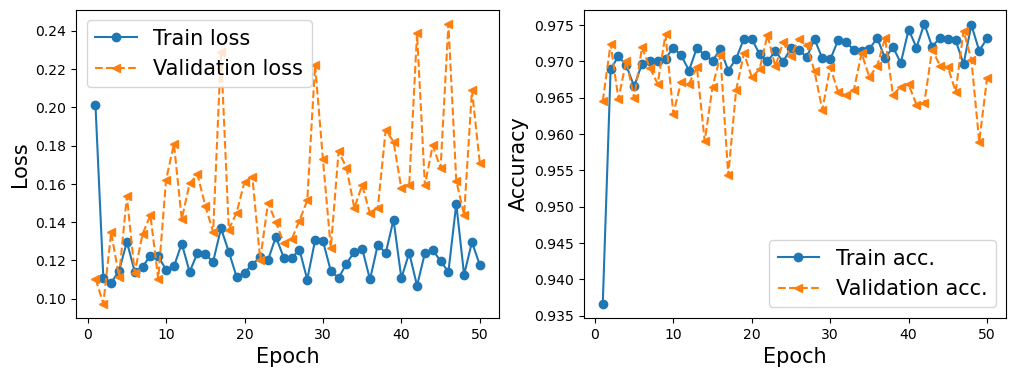

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()